In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Loading data
data = pd.read_csv("predict_failure.csv")

In [3]:
# Instances and features
data.shape

(124494, 12)

In [4]:
# Preview
data.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
# Seeing which would be categorical 
data.apply(lambda x: len(x.unique()))

date             304
device          1168
failure            2
attribute1    123878
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
dtype: int64

In [6]:
# Feature d types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
# Seeing if any possible correlated continuous attributes
data.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


attribute3 and attribute9 seem to be correlated

In [8]:
# Checking similarity between attr7 and attr8
data[data['attribute7']!=data['attribute8']].shape[0]

0

attribute8 is a duplicate of attribute7

In [9]:
# Checking class distribution
data['failure'].value_counts()/data.shape[0]

0    0.999149
1    0.000851
Name: failure, dtype: float64

In [10]:
# Actual counts
data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

Keep in mind that failure is rare

In [11]:
# Conditional probability P(y | xi)
def conditional_prob(x_col, regress=True, y_col='failure', data=data):
    if not regress:
        for val in np.unique(data[x_col]):
            a = data[data[x_col]==val][y_col].value_counts() / data.shape[0]
            b = data[data[x_col]==val][y_col].shape[0] / data.shape[0]
            print(f"{val}:\n{round(a/b, 4)}")
        return
        
    for val in [data[x_col].min()-1, data[x_col].min(), data[x_col].mean(), data[x_col].median()]:
    # P(y, X_i>value)
        a = data[data[x_col]>val][y_col].value_counts() / data.shape[0]
    # P(X_i>value)
        b = data[data[x_col]>val][y_col].shape[0] / data.shape[0]
        print(round(a/b, 4))

### attribute1

In [12]:
# P(y | x1>-1), P(y | x1>x1.min), P(y | x1>x1.mean), P(y | x1>x1.median)
conditional_prob('attribute1')

0    0.9991
1    0.0009
Name: failure, dtype: float64
0    0.9991
1    0.0009
Name: failure, dtype: float64
0    0.9991
1    0.0009
Name: failure, dtype: float64
0    0.9991
1    0.0009
Name: failure, dtype: float64


Higher attr1 doesn't seem to correlate with more failures

(array([12507., 12300., 12164., 12498., 12379., 12374., 12649., 12590.,
        12619., 12308.]),
 array([0.00000000e+00, 2.44140480e+07, 4.88280960e+07, 7.32421440e+07,
        9.76561920e+07, 1.22070240e+08, 1.46484288e+08, 1.70898336e+08,
        1.95312384e+08, 2.19726432e+08, 2.44140480e+08]),
 <BarContainer object of 10 artists>)

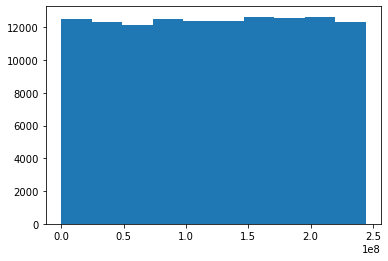

In [13]:
# Distribution of attribute 1 given that its non-failure
plt.hist(data[data['failure']==0]['attribute1'])

(array([10., 11.,  6., 16.,  6.,  6., 18., 14.,  7., 12.]),
 array([4.52737600e+06, 2.84007600e+07, 5.22741440e+07, 7.61475280e+07,
        1.00020912e+08, 1.23894296e+08, 1.47767680e+08, 1.71641064e+08,
        1.95514448e+08, 2.19387832e+08, 2.43261216e+08]),
 <BarContainer object of 10 artists>)

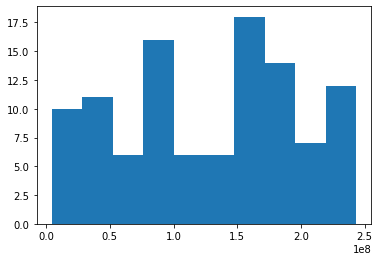

In [14]:
# Distribution of attribute 1 given that its failure
plt.hist(data[data['failure']==1]['attribute1'])

Negative data for non-failures, but not for failures. </br>
Seems to follow gaussian distribution but only when failure is true, uniform otherwise

### attribute2

In [15]:
# P(y | x2>-1), P(y | x2>x2.min), P(y | x2>x2.mean), P(y | x2>x2.median)
conditional_prob('attribute2')

0    0.9991
1    0.0009
Name: failure, dtype: float64
0    0.9925
1    0.0075
Name: failure, dtype: float64
0    0.9903
1    0.0097
Name: failure, dtype: float64
0    0.9925
1    0.0075
Name: failure, dtype: float64


Unlike attribute 1, failure is more likely given that attribute 2 is greater than 0 but still negligible

(array([1.23934e+05, 2.28000e+02, 2.50000e+01, 2.40000e+01, 1.00000e+00,
        9.00000e+00, 3.80000e+01, 5.10000e+01, 5.00000e+00, 7.30000e+01]),
 array([    0. ,  6496.8, 12993.6, 19490.4, 25987.2, 32484. , 38980.8,
        45477.6, 51974.4, 58471.2, 64968. ]),
 <BarContainer object of 10 artists>)

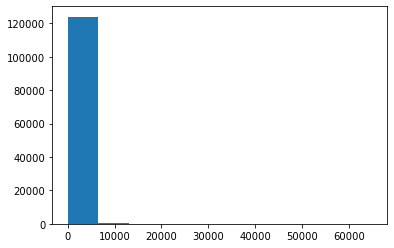

In [16]:
# Attribute 2 distribution given that is a non-failure
plt.hist(data[data['failure']==0]['attribute2'])

(array([93.,  5.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  4.]),
 array([    0. ,  6478.4, 12956.8, 19435.2, 25913.6, 32392. , 38870.4,
        45348.8, 51827.2, 58305.6, 64784. ]),
 <BarContainer object of 10 artists>)

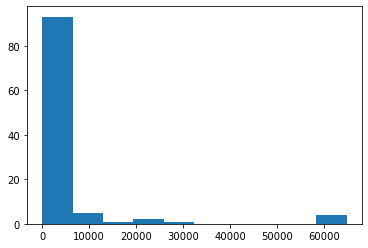

In [17]:
# Attribute 2 distribution given that its a failure
plt.hist(data[data['failure']==1]['attribute2'])

Lots of 0s with attribute 2, distribution doesn't change amongst classes unlike attribute 1. <br>
Maybe higher attr2 correlates with more failures if many of the 0s are invalid data.

### attribute3

In [18]:
# Attribute 3 counts
data['attribute3'].value_counts()

0        115359
1          3274
2           749
7           298
34          293
5           278
21          269
4           268
9           262
8           251
61          245
100         245
10          241
1331        240
220         240
107         228
15          225
62          224
2693        179
318         177
70          118
3           113
18          106
56           96
12           90
72           84
263          84
406          84
35           70
11           14
208          13
14           12
25            6
2112          6
323           6
266           6
377           6
16            5
382           5
36            5
53            5
1326          5
24929         4
279           3
24            1
38            1
1162          1
Name: attribute3, dtype: int64

In [19]:
# Conditional probability for each value attr3 can hold
conditional_prob('attribute3', regress=False)

0:
0    0.9992
1    0.0008
Name: failure, dtype: float64
1:
0    0.9985
1    0.0015
Name: failure, dtype: float64
2:
0    0.9973
1    0.0027
Name: failure, dtype: float64
3:
0    1.0
Name: failure, dtype: float64
4:
0    1.0
Name: failure, dtype: float64
5:
0    1.0
Name: failure, dtype: float64
7:
0    1.0
Name: failure, dtype: float64
8:
0    0.996
1    0.004
Name: failure, dtype: float64
9:
0    0.9962
1    0.0038
Name: failure, dtype: float64
10:
0    1.0
Name: failure, dtype: float64
11:
0    1.0
Name: failure, dtype: float64
12:
0    1.0
Name: failure, dtype: float64
14:
0    1.0
Name: failure, dtype: float64
15:
0    1.0
Name: failure, dtype: float64
16:
0    1.0
Name: failure, dtype: float64
18:
0    1.0
Name: failure, dtype: float64
21:
0    1.0
Name: failure, dtype: float64
24:
0    1.0
Name: failure, dtype: float64
25:
0    1.0
Name: failure, dtype: float64
34:
0    1.0
Name: failure, dtype: float64
35:
0    1.0
Name: failure, dtype: float64
36:
0    1.0
Name: failure, dtype

Failures are no more likely for any value of attr3

(array([1.24205e+05, 1.79000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([    0. ,  2492.9,  4985.8,  7478.7,  9971.6, 12464.5, 14957.4,
        17450.3, 19943.2, 22436.1, 24929. ]),
 <BarContainer object of 10 artists>)

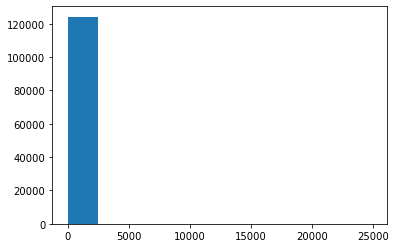

In [20]:
# Attribute 3 distribution given that its a non-failure
plt.hist(data[data['failure']==0]['attribute3'])

(array([104.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  31.8,  63.6,  95.4, 127.2, 159. , 190.8, 222.6, 254.4,
        286.2, 318. ]),
 <BarContainer object of 10 artists>)

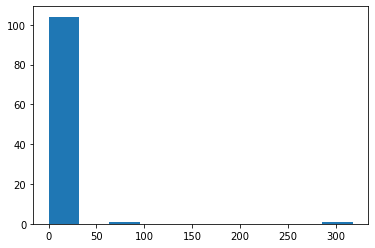

In [21]:
# Attribute 3 distribution given that its a failure
plt.hist(data[data['failure']==1]['attribute3'])

attr3 follows same as attr2, except less prediction power

What is the pattern of data where many/all features are 0?

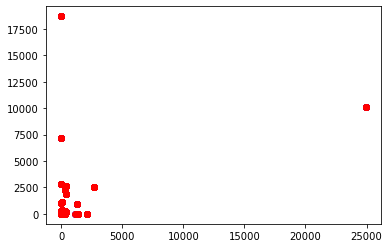

In [22]:
# Seeing 0.5 correlation between attr3 and attr9
color = ['blue', 'red']
for i, c in enumerate(np.unique(data['failure'])):
    plt.scatter(data['attribute3'], data['attribute9'], color=color[int(c)])

We will have to remove some outliers from the data

### attribute4

In [23]:
# Conditional prob for each value attr4 can hold
conditional_prob('attribute4', regress=False)

0:
0    0.9996
1    0.0004
Name: failure, dtype: float64
1:
0    0.9899
1    0.0101
Name: failure, dtype: float64
2:
0    0.9958
1    0.0042
Name: failure, dtype: float64
3:
0    0.9979
1    0.0021
Name: failure, dtype: float64
4:
0    0.9972
1    0.0028
Name: failure, dtype: float64
5:
0    1.0
Name: failure, dtype: float64
6:
0    0.9997
1    0.0003
Name: failure, dtype: float64
7:
0    0.9829
1    0.0171
Name: failure, dtype: float64
8:
0    0.9941
1    0.0059
Name: failure, dtype: float64
9:
0    0.9111
1    0.0889
Name: failure, dtype: float64
10:
0    0.9966
1    0.0034
Name: failure, dtype: float64
11:
0    0.8571
1    0.1429
Name: failure, dtype: float64
12:
0    0.9912
1    0.0088
Name: failure, dtype: float64
13:
0    1.0
Name: failure, dtype: float64
14:
0    1.0
Name: failure, dtype: float64
15:
0    1.0
Name: failure, dtype: float64
16:
0    0.9778
1    0.0222
Name: failure, dtype: float64
17:
0    1.0
Name: failure, dtype: float64
18:
0    0.9595
1    0.0405
Name: failure

Value 9, 11, 16, 18, 19, 23, 39, 48, 55, 58, 60, 69, 74, 95, 121, 406, 486, 1666 are values of attr4 where there is significant change in the percentage of failures.

In [24]:
# Attribute 4 counts for values where percentage of failure increased
for value in [9, 11, 16, 18, 19, 23, 39, 48, 55, 58, 60, 69, 74, 95, 121, 406, 486, 1666]:
    print(f"{value}: {data[data['attribute4']==value].shape[0]}")

9: 45
11: 14
16: 90
18: 74
19: 3
23: 8
39: 3
48: 5
55: 8
58: 2
60: 9
69: 58
74: 20
95: 49
121: 13
406: 2
486: 15
1666: 9


The more data the less probability of failure, still some are significant, about double the probability of failure for the ones with more data. We can change attr4 to be 0 if the value doesn't falls into these values, or 1 if does.

(array([1.24109e+05, 2.13000e+02, 3.70000e+01, 1.10000e+01, 1.00000e+00,
        0.00000e+00, 9.00000e+00, 0.00000e+00, 0.00000e+00, 8.00000e+00]),
 array([   0. ,  166.6,  333.2,  499.8,  666.4,  833. ,  999.6, 1166.2,
        1332.8, 1499.4, 1666. ]),
 <BarContainer object of 10 artists>)

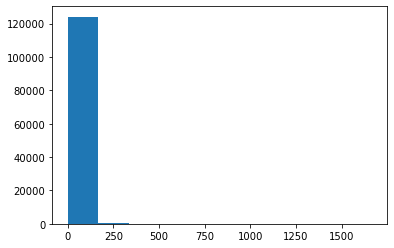

In [25]:
# Attribute 4 distribution given that its a non-failure
plt.hist(data[data['failure']==0]['attribute4'])

(array([99.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([   0. ,  166.6,  333.2,  499.8,  666.4,  833. ,  999.6, 1166.2,
        1332.8, 1499.4, 1666. ]),
 <BarContainer object of 10 artists>)

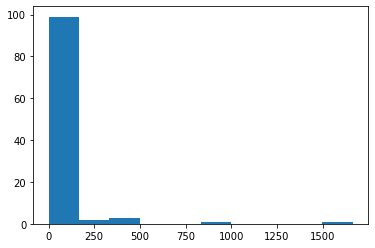

In [26]:
# Attribute 4 distribution given that its a failure
plt.hist(data[data['failure']==1]['attribute4'])

Will just change to binary feature as stated in few previous cells

### attribute5

In [27]:
# Conditional probability for attr5 for each of the values it can hold
conditional_prob('attribute5', regress=False)

1:
0    1.0
Name: failure, dtype: float64
2:
0    1.0
Name: failure, dtype: float64
3:
0    0.9988
1    0.0012
Name: failure, dtype: float64
4:
0    0.9989
1    0.0011
Name: failure, dtype: float64
5:
0    1.0
Name: failure, dtype: float64
6:
0    0.9992
1    0.0008
Name: failure, dtype: float64
7:
0    0.9991
1    0.0009
Name: failure, dtype: float64
8:
0    0.9991
1    0.0009
Name: failure, dtype: float64
9:
0    0.9993
1    0.0007
Name: failure, dtype: float64
10:
0    0.9994
1    0.0006
Name: failure, dtype: float64
11:
0    0.9997
1    0.0003
Name: failure, dtype: float64
12:
0    0.999
1    0.001
Name: failure, dtype: float64
13:
0    0.9993
1    0.0007
Name: failure, dtype: float64
14:
0    0.9986
1    0.0014
Name: failure, dtype: float64
15:
0    1.0
Name: failure, dtype: float64
16:
0    0.9981
1    0.0019
Name: failure, dtype: float64
17:
0    0.9981
1    0.0019
Name: failure, dtype: float64
18:
0    1.0
Name: failure, dtype: float64
19:
0    0.9989
1    0.0011
Name: failure,

Should we do same thing as attr4?

In [28]:
# Checking counts for the values that earn higher percentage failures
for value in [30, 41]:
    print(f"{value}: {data[data['attribute5']==value].shape[0]}")

30: 45
41: 8


(array([72530., 39229.,  1882.,  3188.,   252.,  1442.,  3055.,   448.,
            0.,  2362.]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

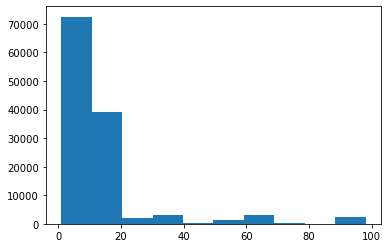

In [29]:
# Attribute 5 distribution given that its a non-failure
plt.hist(data[data['failure']==0]['attribute5'])

(array([61., 28.,  3.,  8.,  1.,  0.,  2.,  1.,  0.,  2.]),
 array([ 3. , 11.8, 20.6, 29.4, 38.2, 47. , 55.8, 64.6, 73.4, 82.2, 91. ]),
 <BarContainer object of 10 artists>)

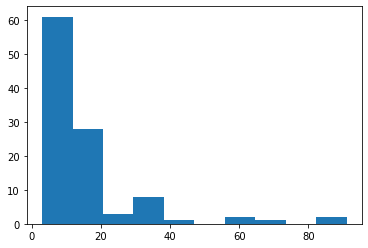

In [30]:
# Attribute 5 distribution given that its a failure
plt.hist(data[data['failure']==1]['attribute5'])

Most likely will drop attr5

### attribute6

In [31]:
# P(y | x6>-1), P(y | x6>x6.min), P(y | x6>x6.mean), P(y | x6>x6.median)
conditional_prob('attribute6')

0    0.9991
1    0.0009
Name: failure, dtype: float64
0    0.9991
1    0.0009
Name: failure, dtype: float64
0    0.9989
1    0.0011
Name: failure, dtype: float64
0    0.999
1    0.001
Name: failure, dtype: float64


(array([8.1640e+03, 4.2200e+02, 8.8560e+03, 6.2618e+04, 2.8446e+04,
        6.2230e+03, 7.1230e+03, 2.4480e+03, 5.7000e+01, 3.1000e+01]),
 array([8.000000e+00, 6.892330e+04, 1.378386e+05, 2.067539e+05,
        2.756692e+05, 3.445845e+05, 4.134998e+05, 4.824151e+05,
        5.513304e+05, 6.202457e+05, 6.891610e+05]),
 <BarContainer object of 10 artists>)

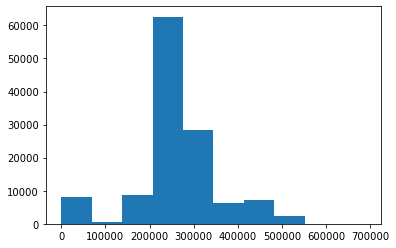

In [32]:
# Attribute 6 distribution given that its a non-failure
plt.hist(data[data['failure']==0]['attribute6'])

(array([ 9.,  1.,  2., 15., 43., 27.,  3.,  1.,  4.,  1.]),
 array([2.400000e+01, 5.748150e+04, 1.149390e+05, 1.723965e+05,
        2.298540e+05, 2.873115e+05, 3.447690e+05, 4.022265e+05,
        4.596840e+05, 5.171415e+05, 5.745990e+05]),
 <BarContainer object of 10 artists>)

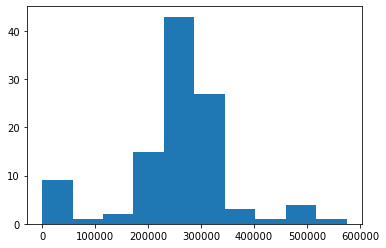

In [33]:
# Attribute 6 distribution given that its a non-failure
plt.hist(data[data['failure']==1]['attribute6'])

attr6 follows a gaussian distribution for both failures and non failures

### attribute7

In [34]:
# Conditional probabilities for all the values attr7 can hold
conditional_prob('attribute7', regress=False)

0:
0    0.9995
1    0.0005
Name: failure, dtype: float64
6:
0    1.0
Name: failure, dtype: float64
8:
0    0.9861
1    0.0139
Name: failure, dtype: float64
16:
0    0.9798
1    0.0202
Name: failure, dtype: float64
22:
0    0.5
1    0.5
Name: failure, dtype: float64
24:
0    0.9538
1    0.0462
Name: failure, dtype: float64
32:
0    0.9143
1    0.0857
Name: failure, dtype: float64
40:
0    0.95
1    0.05
Name: failure, dtype: float64
48:
0    0.9167
1    0.0833
Name: failure, dtype: float64
56:
0    0.6667
1    0.3333
Name: failure, dtype: float64
72:
0    0.9091
1    0.0909
Name: failure, dtype: float64
80:
0    0.75
1    0.25
Name: failure, dtype: float64
96:
0    1.0
Name: failure, dtype: float64
104:
0    1.0
Name: failure, dtype: float64
112:
0    1.0
Name: failure, dtype: float64
128:
0    1.0
Name: failure, dtype: float64
136:
0    1.0
Name: failure, dtype: float64
152:
0    1.0
Name: failure, dtype: float64
176:
0    0.95
1    0.05
Name: failure, dtype: float64
216:
1    1.0
Name

16, 22, 24, 32, 40, 48, 56, 72, 80, 176, 832 all seem to have prediction power for failure

In [35]:
# Attribrute 7 value counts where values seem to have predictive power
for value in [16, 22, 24, 32, 40, 48, 56, 72, 80, 176, 832]:
    print(f"{value}: {data[data['attribute7']==value].shape[0]}")

16: 397
22: 2
24: 65
32: 35
40: 20
48: 36
56: 6
72: 11
80: 4
176: 20
832: 2


We can do same thing with attr7 as attr4

(array([1.24317e+05, 3.80000e+01, 2.00000e+01, 7.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00, 1.00000e+00]),
 array([  0. ,  83.2, 166.4, 249.6, 332.8, 416. , 499.2, 582.4, 665.6,
        748.8, 832. ]),
 <BarContainer object of 10 artists>)

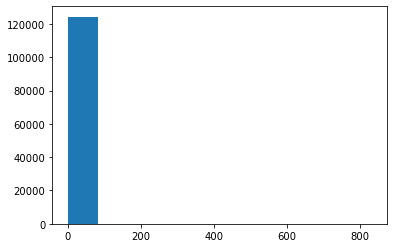

In [36]:
# Attribute 7 distribution given that its a non-failure
plt.hist(data[data['failure']==0]['attribute7'])

(array([101.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   1.,   1.]),
 array([  0. ,  83.2, 166.4, 249.6, 332.8, 416. , 499.2, 582.4, 665.6,
        748.8, 832. ]),
 <BarContainer object of 10 artists>)

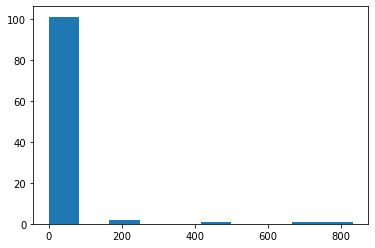

In [37]:
# Attribute 7 distribution given that its a failure
plt.hist(data[data['failure']==1]['attribute7'])

Will be binary feature

### attribute9

In [38]:
# Conditional probabilities for all the values attr9 can hold
conditional_prob('attribute9', regress=False)

0:
0    0.9992
1    0.0008
Name: failure, dtype: float64
1:
0    0.9993
1    0.0007
Name: failure, dtype: float64
2:
0    0.9984
1    0.0016
Name: failure, dtype: float64
3:
0    0.9983
1    0.0017
Name: failure, dtype: float64
4:
0    1.0
Name: failure, dtype: float64
5:
0    0.9959
1    0.0041
Name: failure, dtype: float64
6:
0    1.0
Name: failure, dtype: float64
7:
0    0.9974
1    0.0026
Name: failure, dtype: float64
8:
0    1.0
Name: failure, dtype: float64
9:
0    0.997
1    0.003
Name: failure, dtype: float64
10:
0    0.9984
1    0.0016
Name: failure, dtype: float64
11:
0    0.993
1    0.007
Name: failure, dtype: float64
12:
0    1.0
Name: failure, dtype: float64
13:
0    1.0
Name: failure, dtype: float64
14:
0    1.0
Name: failure, dtype: float64
15:
0    1.0
Name: failure, dtype: float64
18:
0    1.0
Name: failure, dtype: float64
19:
0    0.975
1    0.025
Name: failure, dtype: float64
20:
0    1.0
Name: failure, dtype: float64
21:
0    1.0
Name: failure, dtype: float64
22:
0 

In [39]:
# Predictive power value counts for attr9
for value in [19, 52, 1080]:
    print(f"{value}: {data[data['attribute9']==value].shape[0]}")

19: 40
52: 19
1080: 14


Correlation between 3 and 9 is coincidence? 

(array([1.24099e+05, 2.75000e+02, 0.00000e+00, 5.00000e+00, 0.00000e+00,
        4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00]),
 array([    0. ,  1870.1,  3740.2,  5610.3,  7480.4,  9350.5, 11220.6,
        13090.7, 14960.8, 16830.9, 18701. ]),
 <BarContainer object of 10 artists>)

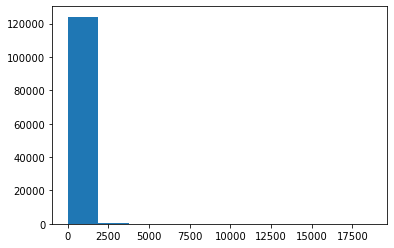

In [40]:
# Attribute 9 distribution given that its a non-failure
plt.hist(data[data['failure']==0]['attribute9'])

(array([104.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([   0. ,  116.5,  233. ,  349.5,  466. ,  582.5,  699. ,  815.5,
         932. , 1048.5, 1165. ]),
 <BarContainer object of 10 artists>)

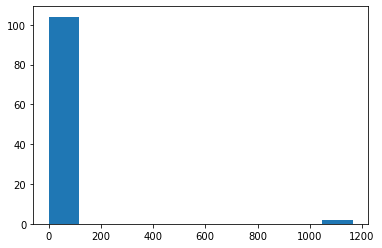

In [41]:
# Attribute 9 distribution given that its a failure
plt.hist(data[data['failure']==1]['attribute9'])

Many 0 values in attributes

Can add date as feature by changing it to one-hot encoding of day of the week, and add binary feature that says whether holiday or not

will add month and year

In [42]:
# Checking if some devices fail more often
len(np.unique((data[data['failure']==1]['device'])))

106

Rare for a device to fail more than once? 

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
class Standardize(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        columns = ['attribute1', 'attribute6']
        for column in columns:
            X[column] = (X[column] - X[column].mean()) / X[column].std()
        return X

In [45]:
class Drop(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        columns = ['attribute8', 'attribute5']
        X.drop(labels=columns, inplace=True, axis=1)
        return X

In [46]:
class BinaryBin(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        values = [
            [16, 22, 24, 32, 40, 48, 56, 72, 80, 176, 832],
            [8, 16, 22, 24, 32, 40, 48, 56, 72, 80, 176, 832],
                 ]
        columns = ['attribute4', 'attribute7']
        for i in range(len(columns)):
            X[columns[i]] = X[columns[i]].isin(values[i]).astype(int)
        
        X['attribute2'] = (X['attribute2'] > 0).astype(int)
        return X

In [47]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
class Date(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        cal = calendar()
        X['date'] = pd.to_datetime(X['date'])
        X['day'] = X['date'].dt.dayofweek
        X['day'] = X['day'].astype('int16')
        X['month_day'] = X['date'].dt.day
        X['month'] = X['date'].dt.month
        X['year'] = X['date'].dt.year
        
        holidays = cal.holidays(start=X['date'].min(), end=X['date'].max())
        X['holiday'] = X['date'].isin(holidays).astype(int)
        X = pd.concat([X, pd.get_dummies(X['day'], prefix='day', drop_first=True)], axis=1)
        X = pd.concat([X, pd.get_dummies(X['month'], prefix='month', drop_first=True)], axis=1)
        X = pd.concat([X, pd.get_dummies(X['year'], prefix='year', drop_first=True)], axis=1)
        X.drop(columns=['date', 'day', 'month', 'year'], axis=1, inplace=True)
        return X

In [48]:
class Device(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        failed = data[data['failure']==1]['device'].values
        X['device_failed_prev'] = X['device'].isin(failed).astype(int)
        X.drop(columns=['device'], inplace=True, axis=1)
        return X

In [49]:
from sklearn.pipeline import Pipeline

data_pipeline = Pipeline([
                            ('Drop', Drop()),
                            ('To binary', BinaryBin()),
                            ('Day', Date()),
                            ('Device previously failed', Device())
                             ])

# Processing

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [51]:
# Separating data 
X = data.drop(['failure'], axis=1)
y = data['failure']

In [52]:
# Splitting data between train and test while keeping each representative
X, y = shuffle(X, y)
X_train = pd.concat([X[y == 0][:99595], X[y== 1][:85]], axis=0)
y_train = pd.concat([y[y == 0][:99595], y[y == 1][:85]], axis=0)
X_test = pd.concat([X[y == 0][99595:], X[y == 1][85:]], axis=0)
y_test = pd.concat([y[y == 0][99595:], y[y == 1][85:]], axis=0)

In [53]:
# Changing training data
X_train = data_pipeline.fit_transform(X_train)
scale = StandardScaler()
X_train

,attribute1,attribute2,attribute3,attribute4,attribute6,attribute7,attribute9,month_day,holiday,day_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_failed_prev
22306,76185856,0,0,0,317345,0,8,28,0,0,...,0,0,0,0,0,0,0,0,0,0
89902,180226624,0,0,0,238667,0,0,7,0,0,...,0,0,0,1,0,0,0,0,0,0
116333,65618808,0,0,0,301102,0,0,28,0,0,...,0,0,0,0,0,1,0,0,0,0
5911,223063984,0,0,0,197805,0,4,6,0,1,...,0,0,0,0,0,0,0,0,0,0
47688,63806160,0,0,0,40,0,0,5,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40984,212770360,1,0,0,7491,0,0,23,0,0,...,0,0,0,0,0,0,0,0,0,1
93822,87115256,0,0,0,268094,0,0,18,0,0,...,0,0,0,1,0,0,0,0,0,1
122118,13739704,0,0,0,343760,0,0,5,0,0,...,0,0,0,0,0,0,0,1,0,1
74966,121900592,0,0,0,246719,0,0,27,0,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
X_train[['attribute1','attribute6']] = scale.fit_transform(
                            X_train[['attribute1','attribute6']])
X_train

,attribute1,attribute2,attribute3,attribute4,attribute6,attribute7,attribute9,month_day,holiday,day_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_failed_prev
22306,-0.654103,0,0,0,0.576427,0,8,28,0,0,...,0,0,0,0,0,0,0,0,0,0
89902,0.821205,0,0,0,-0.215808,0,0,7,0,0,...,0,0,0,1,0,0,0,0,0,0
116333,-0.803944,0,0,0,0.412870,0,0,28,0,0,...,0,0,0,0,0,1,0,0,0,0
5911,1.428643,0,0,0,-0.627261,0,4,6,0,1,...,0,0,0,0,0,0,0,0,0,0
47688,-0.829648,0,0,0,-2.618622,0,0,5,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40984,1.282678,1,0,0,-2.543596,0,0,23,0,0,...,0,0,0,0,0,0,0,0,0,1
93822,-0.499123,0,0,0,0.080502,0,0,18,0,0,...,0,0,0,1,0,0,0,0,0,1
122118,-1.539595,0,0,0,0.842408,0,0,5,0,0,...,0,0,0,0,0,0,0,1,0,1
74966,-0.005863,0,0,0,-0.134730,0,0,27,0,0,...,0,1,0,0,0,0,0,0,0,1


In [55]:
# Changing test data
X_test = data_pipeline.fit_transform(X_test)
X_test

,attribute1,attribute2,attribute3,attribute4,attribute6,attribute7,attribute9,month_day,holiday,day_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_failed_prev
23556,111501904,0,0,0,229521,0,0,29,0,0,...,0,0,0,0,0,0,0,0,0,0
13377,46428816,0,0,0,205989,0,0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3672,78015216,0,0,0,211571,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
16209,39096024,0,0,0,316359,0,0,19,1,0,...,0,0,0,0,0,0,0,0,0,0
41714,15655320,1,0,0,341208,0,0,24,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86358,182617240,1,0,0,236109,0,1,28,0,0,...,0,0,1,0,0,0,0,0,0,1
15898,238299872,1,0,0,268662,1,0,19,1,0,...,0,0,0,0,0,0,0,0,0,1
38346,37422416,1,0,0,309876,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,1
8823,136429411,1,0,0,224801,1,0,9,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
X_test[['attribute1', 'attribute6']] = scale.transform(
    X_test[['attribute1', 'attribute6', ]])
X_test

,attribute1,attribute2,attribute3,attribute4,attribute6,attribute7,attribute9,month_day,holiday,day_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_failed_prev
23556,-0.153318,0,0,0,-0.307902,0,0,29,0,0,...,0,0,0,0,0,0,0,0,0,0
13377,-1.076060,0,0,0,-0.544854,0,0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3672,-0.628162,0,0,0,-0.488647,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
16209,-1.180040,0,0,0,0.566498,0,0,19,1,0,...,0,0,0,0,0,0,0,0,0,0
41714,-1.512431,1,0,0,0.816711,0,0,24,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86358,0.855104,1,0,0,-0.241566,0,1,28,0,0,...,0,0,1,0,0,0,0,0,0,1
15898,1.644689,1,0,0,0.086221,1,0,19,1,0,...,0,0,0,0,0,0,0,0,0,1
38346,-1.203772,1,0,0,0.501219,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,1
8823,0.200157,1,0,0,-0.355430,1,0,9,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X_test.head()

,attribute1,attribute2,attribute3,attribute4,attribute6,attribute7,attribute9,month_day,holiday,day_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_failed_prev
23556,-0.153318,0,0,0,-0.307902,0,0,29,0,0,...,0,0,0,0,0,0,0,0,0,0
13377,-1.076060,0,0,0,-0.544854,0,0,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3672,-0.628162,0,0,0,-0.488647,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
16209,-1.180040,0,0,0,0.566498,0,0,19,1,0,...,0,0,0,0,0,0,0,0,0,0
41714,-1.512431,1,0,0,0.816711,0,0,24,0,1,...,0,0,0,0,0,0,0,0,0,0


# Training

### Will use anomaly detection

In [150]:
# Changing these to see which features don't hold predictive power
columns = ['attribute1', 'attribute2', 'day_1','day_3', 'day_4', 'day_5', 'attribute3', 'attribute9']
#for i in range(2, 12):
    #columns.append(f'month_{i}')

In [151]:
# The ML model
model = RandomForestClassifier()
model.fit(X_train.drop(columns=columns, axis=1), y_train)

RandomForestClassifier()

In [156]:
threshold = 0.0799
result = model.predict_proba(X_test.drop(columns=columns, axis=1))
result = pd.DataFrame(data=result, columns=['prob0', 'prob1'])
result['pred'] = (result['prob1'] >= threshold).astype(int).astype(int)
result['true'] = y_test.reset_index(drop=True)

In [157]:
# Result
result[(result['pred']==1) & (result['true']==0)]

,prob0,prob1,pred,true
1186,0.89,0.11,1,0
2362,0.90,0.10,1,0
2976,0.65,0.35,1,0
3216,0.84,0.16,1,0
3826,0.64,0.36,1,0
4743,0.91,0.09,1,0
4895,0.92,0.08,1,0
4932,0.62,0.38,1,0
5020,0.89,0.11,1,0
5024,0.90,0.10,1,0


In [158]:
result[(result['pred']==0) & (result['true']==1)]

,prob0,prob1,pred,true
24794,0.99,0.01,0,1
24796,1.00,0.00,0,1
24797,0.96,0.04,0,1
24799,1.00,0.00,0,1
24800,1.00,0.00,0,1
24801,1.00,0.00,0,1
24803,0.94,0.06,0,1
24805,1.00,0.00,0,1
24808,1.00,0.00,0,1
24809,1.00,0.00,0,1


In [160]:
# F1 score
print("Test f1:", f1_score(result['true'], result['pred']))

Test f1: 0.20253164556962022
